# Assignment 2
This  assignment  is  worth 160  points.  It  will  be due  on  Thursday, 10/31/2023,  and  submitted  through Canvas.  Code shouldbe  written  in Python.Other  programming  language  can  beused upon instructor’s approval. A written report should be submittedas a separate document along with the code through Canvas.If you use Jupyter Notebook, then you may submit a single “.ipynb” file through Canvas.

Data: A  dataset,  “iris.data”, and  an  image,  “Assignment  2_image.jpg”,  areprovided  to  you.  Data description for “iris.data” can be found in “iris.names”. Please read through the document and then use the data to do the following tasks. Note: You may consider the samplesasindependent and identically distributed (iid).

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans,AgglomerativeClustering
from PIL import Image
import itertools

----
# Part 1(60pts)
Use “Assignment 2_image.jpg” for this part.

## Problem 1.
Image compression with k-means: k-means clustering algorithm can be used for image compression.The image is divided into non overlapping cXc windows and these c^2-dimensional vectors make up the sample. For a given k, we do k-means clustering. The reference vectors and the index for each window is sent over the communication line. At the receiving end, the image is then reconstructed by reading from the table of reference vectors using the indices. Write the computer program that does this for k∈{4,8,16}and c ∈{20,40,60}. For each pair of (k,c),(1) save the compressed images as “.jpg” or “.png”, and (2) calculate the reconstruction error(Eq. (6.12) in textbook).

Each pair of (k,c) will have a reconstruction error and a compression rate, so you will have 9pairs of rates.Use Python library “scikit-learn.clsuter”. The image may be RGB-colored, so you can flatten each window into  a  vector  of  length c×c×3using “ndarray.flatten(‘F’)” in Python and then convert it back to a c×c×3matrix when reconstructing the compressed image.(Hint: Use “for” or “while” loop to exhaust all combinations of (k,c).To visualize your compressed images without issues, keep in mind to use integer data type, i.e., “int” in Python, for pixel values.) (30 pts)

Reconstruction Error (6.12): $\sum_t ||x^{t} -\hat{x}^t ||^2$

[k=4 & c=20] Reconstruction Error = 8157964103.670564
[k=4 & c=40] Reconstruction Error = 9562960491.990335
[k=4 & c=60] Reconstruction Error = 10828618336.705587
[k=8 & c=20] Reconstruction Error = 6375926105.218241
[k=8 & c=40] Reconstruction Error = 7687792087.99673
[k=8 & c=60] Reconstruction Error = 8740024180.543518
[k=16 & c=20] Reconstruction Error = 5599551277.7595
[k=16 & c=40] Reconstruction Error = 6503546338.124105
[k=16 & c=60] Reconstruction Error = 7096272929.425628


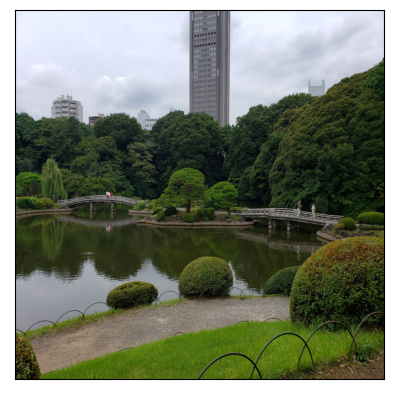

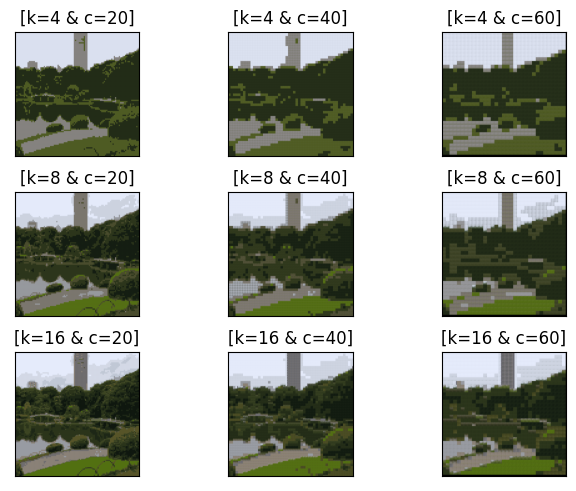

In [3]:
def import_img(img_path):
    img = np.asarray(Image.open(img_path))
    # img = cv2.imread(img_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = img / 255.0
    return img
def vectorize_windows(img,c):
    nrow = int(np.shape(img)[0]/c)
    ncol = int(np.shape(img)[0]/c)
    window_vectors = []
    for row in range(nrow):
        for col in range(ncol):
            window = img[row*c:(row+1)*c,col*c:(col+1)*c]
            window_vectors.append( window.flatten())
            # window_vector.reshape([c,c,3]) to convert back
    return window_vectors


def problem_1_pt1():
    K = [4,8,16]
    C = [20,40,60]

    # Step 1: import Image
    img = import_img("Assignment 2_image.jpg")
    fig,ax = plt.subplots(1,1)
    ax.imshow(img)
    ax.set_xticks([]); ax.set_yticks([])


    fig,axs = plt.subplots(3,3,constrained_layout=True)
    axs = axs.flatten(); iax = 0
    for k,c in itertools.product(K,C):
        # Step 2: Vectorize Image
        img_vec = vectorize_windows(img,c)

        # Step 3: Kmeans Clustering
        img_kmeans = KMeans(k).fit(img_vec)
        mean_idx = img_kmeans.labels_
        means = img_kmeans.cluster_centers_

        # Step 4: Reconstruct
        reconstructed_img = np.zeros(np.shape(img))
        nrow = int(np.shape(img)[0]/c)
        ncol = int(np.shape(img)[0]/c)
        row=0;col=0
        for i in mean_idx:
            window = means[i].reshape([c,c,3])
            reconstructed_img[row*c:(row+1)*c,col*c:(col+1)*c] = window
            if col == ncol-1: row += 1; col = 0
            else: col += 1
        axs[iax].imshow(reconstructed_img.astype(int))
        axs[iax].set_title(f'[k={k} & c={c}]')
        axs[iax].set_xticks([]); axs[iax].set_yticks([])
        # Step 4: Reconstruction Error
        err = np.linalg.norm(np.array(img_vec)-np.array([means[i] for i in mean_idx]))**2
        print(f'[k={k} & c={c}] Reconstruction Error = {err}')

        iax +=1

problem_1_pt1()

## Problem 2
Based on the reconstruction errors in1, identify the best combination ofk and c. (5 pts)

**ANS:** The compression with the least consturction error is $k=16$ and $c=20$

## Problem 3
Image  compression with  hierarchical  clustering:Repeat  the  image  compression  task  in  1  using agglomerative clustering algorithm with complete link. Again,k ∈{4,8,16} and c∈{20,40,60}.For each pair of (k ,c), (1) save the compressed images as “.jpg” or “.png”, and (2) calculate the reconstruction error. (Hint: Change the clusteringfunction to “Agglomerative Clustering” in Python library “scikit-learn”.) (20pts)

[k=4 & c=20] Reconstruction Error = 8702831367.850513
[k=4 & c=40] Reconstruction Error = 10197685546.45424
[k=4 & c=60] Reconstruction Error = 11310569583.27624
[k=8 & c=20] Reconstruction Error = 6749646060.187791
[k=8 & c=40] Reconstruction Error = 8082104971.115401
[k=8 & c=60] Reconstruction Error = 9072547865.911999
[k=16 & c=20] Reconstruction Error = 5872638706.643141
[k=16 & c=40] Reconstruction Error = 6801125839.525432
[k=16 & c=60] Reconstruction Error = 7339723988.149946


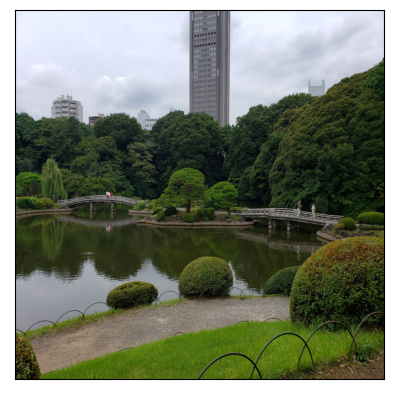

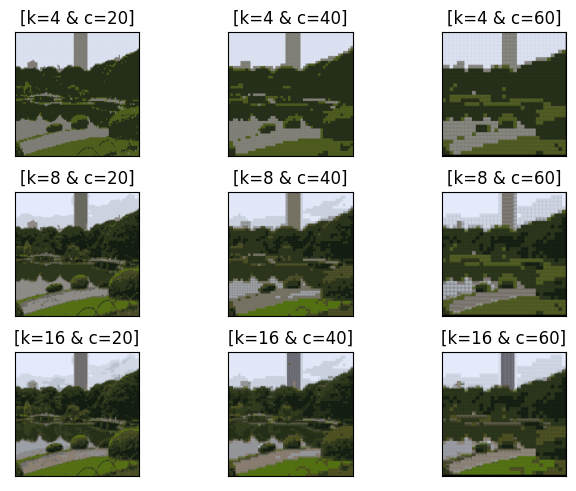

In [4]:
def problem_1_pt2():
    K = [4,8,16]
    C = [20,40,60]

    # Step 1: import Image
    img = import_img("Assignment 2_image.jpg")
    # fig,ax = plt.subplots(1,1)
    # ax.imshow(img)
    # ax.set_xticks([]); ax.set_yticks([])


    fig,axs = plt.subplots(3,3,constrained_layout=True)
    axs = axs.flatten(); iax = 0
    for k,c in itertools.product(K,C):
        # Step 2: Vectorize Image
        img_vec = vectorize_windows(img,c)

        # Step 3: AgglomerativeClustering Clustering
        img_cluster = AgglomerativeClustering(k).fit(img_vec)
        mean_idx = img_cluster.labels_
        means =  [np.mean(np.array(img_vec)[np.where(mean_idx==i)[0]],axis=0) for i in range(k)]

        # Step 4: Reconstruct
        reconstructed_img = np.zeros(np.shape(img))
        nrow = int(np.shape(img)[0]/c)
        ncol = int(np.shape(img)[0]/c)
        row=0;col=0
        for i in mean_idx:
            window = means[i].reshape([c,c,3])
            reconstructed_img[row*c:(row+1)*c,col*c:(col+1)*c] = window
            if col == ncol-1: row += 1; col = 0
            else: col += 1
        axs[iax].imshow(reconstructed_img.astype(int))
        axs[iax].set_title(f'[k={k} & c={c}]')
        axs[iax].set_xticks([]); axs[iax].set_yticks([])
        # Step 4: Reconstruction Error
        err = np.linalg.norm(np.array(img_vec)-np.array([means[i] for i in mean_idx]))**2
        print(f'[k={k} & c={c}] Reconstruction Error = {err}')

        iax +=1

problem_1_pt2()

## Problem 4
For the results of 3, identify the best value for k and cbased on the reconstruction error and compression rate. (5 pts)

**ANS:** The compression with the least construction error is $k=16$ and $c=20$


----
# Part 2 (100 pts)
Use “iris.data” for this part. You may find the variable names in “iris.names”. The final column of “iris.data” is the ground-truth class.

## Problem 1
1.For class “setosa”, visualize  their kernel  estimate using  a Gaussian  kernel for bin  length h∈{1,0.5,0.25}. You will use multivariate Gaussian density. This is the high-dimensional version of Eq. (8.6) and (8.7) in textbook. (Hint: To get the horizontal axis, generate data sequence for the range of each variable and then use them together to get one set of Gaussian kernel estimate. Then, visualize the Gaussian estimate against each variable, respectively, to get 4 kernel estimate plots for each h-value.) (15pts)

## Problem 2
Split the iris data into training set (take 50% of the data points in each class) and testing set (the rest 50% of the data points in each class). This type of data split is called “stratified sampling”. (10pts)

## Problem 3
Perform classification analysiswith k-nearest neighbors. k ∈{3,5,10,20}. Specifically, you will fix a k valueand traink -nearest  neighbors  classifier with  the  training  set  in  2  and  then  use  the  classifier  on testing set to do prediction. Calculate the confusion matrixand prediction accuracy for each k . Identify the k value  giving  the  best  performance  and  briefly  comment  the  result.  (Hint: Use “neighbors” in Python “scikit learn” library.) (25pts)

## Problem 4
 Repeat the problem in 2 using classification treewith Gini indexas the impurity measure. Still, you will reportthe confusion matrix and prediction accuracy. (Hint: Use “tree” in Python “scikit learn” library.) (20 pts)


## Problem 5
Repeat  the  problem  in  2  using logistic  regression. Still,  you  will  report  the  confusion  matrix  and prediction accuracy. (Hint: Use “linear_model” in Python “scikit learn” library.) (20 pts)

## Problem 6
 Among k -nearest  neighbors,  classification  tree,  and  logistic  regression,  which  achieves  the  best classification accuracy? Please explain why the classification method performs better than the others. (Hint: you can make reasonable conjecture.) (5 pts)

## Problem 7
In terms of the class densities, what is the biggest difference between logistic regression and the other two classification methods (k -nearest neighbors and decision tree)? (5 pts)

---
# Bonus: Part 3 (40 pts)
Use “Assignment 2_image1.jpg” for this part
## Problem 1
1.Object  recognition  with  neural  nets: Convolutional  Neural  Nets  (CNNs)  are  powerful  tools  in computer vision. There are multiple model variants based on CNNs that recognize objects in an image. An example   is You-Only-Look-Once  (YOLO)(https://towardsdatascience.com/yolo-object-detection-with-opencv-and-python-21e50ac599e9). There is pretrained YOLO model accessible through Python library. For the given image, please use the pretrained YOLO model to recognize objects. Comment on the correctly and incorrectly recognized objects.(35pts)

## Problem 2
 Briefly explain the connection and difference between CNNs and multilayer perceptron. (5 pts)